## Modelling road network of Indian cities

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

/home/gokul/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/gokul/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/gokul/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/gokul/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

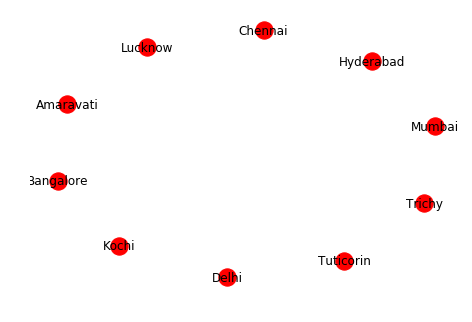

In [2]:
G = nx.Graph() #Undirected NULL graph
#G = nx.DiGraph() #Directed Graph
cities = ['Delhi', 'Trichy', 'Mumbai', 'Tuticorin', 'Chennai', 'Kochi', 'Hyderabad', 'Bangalore', 'Lucknow', 'Amaravati']
for city in cities:
    G.add_node(city)
nx.draw(G, with_labels=1)
plt.show()

In [3]:
import random as rd
costs = [rd.randint(50, 1000) for x in range(10) ]
print costs
print len(costs)
print "Edges : ", G.number_of_edges()
print "Nodes : ", G.number_of_nodes()

[363, 587, 639, 691, 207, 344, 804, 119, 743, 734]
10
Edges :  0
Nodes :  10


[('Hyderabad', 'Tuticorin'), ('Hyderabad', 'Bangalore'), ('Hyderabad', 'Chennai'), ('Chennai', 'Tuticorin'), ('Chennai', 'Lucknow'), ('Lucknow', 'Delhi'), ('Lucknow', 'Kochi'), ('Delhi', 'Bangalore'), ('Kochi', 'Tuticorin'), ('Bangalore', 'Trichy')]


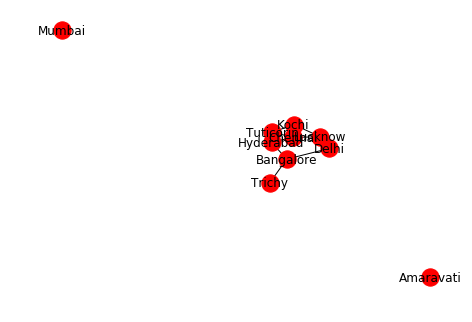

In [4]:
#Addding 10 edges to the graph
while(G.number_of_edges() != 10):
    city1 = rd.choice(G.nodes())
    city2 = rd.choice(G.nodes())
    wt = rd.choice(costs)#selecting random costs
    if city1 != city2 and G.has_edge(city1, city2) == 0:
        G.add_edge(city1, city2, weight = wt)
print G.edges()
nx.draw(G, with_labels=1)
plt.show()

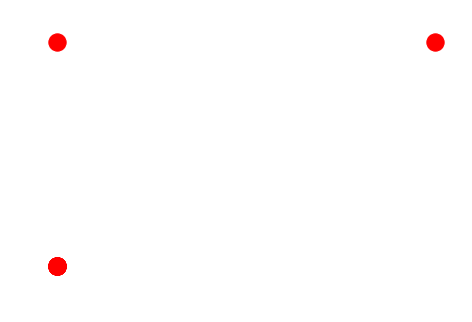

In [5]:
pos = nx.spectral_layout(G)
nx.draw(G, pos)
plt.show()

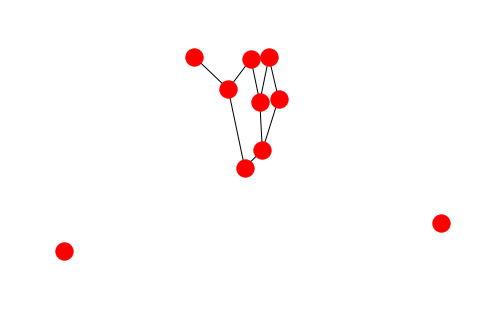

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

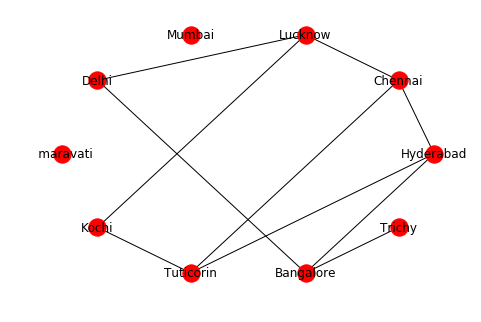

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

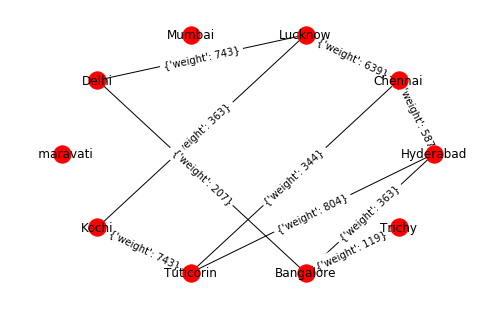

In [8]:
#Visulaising edge weights
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [9]:
print nx.is_connected(G)

False


In [10]:
for u in G.nodes():
    for v in G.nodes():
        print u, v, nx.has_path(G, u, v)

Hyderabad Hyderabad True
Hyderabad Chennai True
Hyderabad Lucknow True
Hyderabad Mumbai False
Hyderabad Delhi True
Hyderabad Amaravati False
Hyderabad Kochi True
Hyderabad Tuticorin True
Hyderabad Bangalore True
Hyderabad Trichy True
Chennai Hyderabad True
Chennai Chennai True
Chennai Lucknow True
Chennai Mumbai False
Chennai Delhi True
Chennai Amaravati False
Chennai Kochi True
Chennai Tuticorin True
Chennai Bangalore True
Chennai Trichy True
Lucknow Hyderabad True
Lucknow Chennai True
Lucknow Lucknow True
Lucknow Mumbai False
Lucknow Delhi True
Lucknow Amaravati False
Lucknow Kochi True
Lucknow Tuticorin True
Lucknow Bangalore True
Lucknow Trichy True
Mumbai Hyderabad False
Mumbai Chennai False
Mumbai Lucknow False
Mumbai Mumbai True
Mumbai Delhi False
Mumbai Amaravati False
Mumbai Kochi False
Mumbai Tuticorin False
Mumbai Bangalore False
Mumbai Trichy False
Delhi Hyderabad True
Delhi Chennai True
Delhi Lucknow True
Delhi Mumbai False
Delhi Delhi True
Delhi Amaravati False
Delhi Koch

In [11]:
#Refer networkx.github.io documentation for dijikstra functions


8


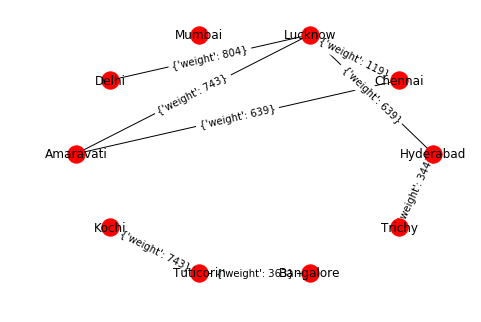

In [12]:
#write a module to create the road network
def create_network(cities, costs, numberOfLinks):
    G = nx.Graph()
    for city in cities:
        G.add_node(city)
    while(G.number_of_edges() < numberOfLinks):
        city1 = rd.choice(G.nodes())
        city2 = rd.choice(G.nodes())
        if city1 != city2 and G.has_edge(city1, city2) == 0:
            G.add_edge(city1, city2, weight = rd.choice(costs))
    return G
G = create_network(cities, costs, 8)
print G.number_of_edges()
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

In [13]:
9999999999

9999999999

In [17]:
G.remove_edge('Trichy', 'Hyderabad')
print nx.dijkstra_path(G, 'Delhi', 'Trichy')
print nx.dijkstra_path_length(G, 'Delhi', 'Trichy')

NetworkXNoPath: node Delhi not reachable from Trichy

In [19]:
G.add_edge('Tuticorin', 'Hyderabad', weight = rd.choice(costs))
print nx.dijkstra_path(G, 'Tuticorin', 'Hyderabad')# source and destination
print nx.dijkstra_path_length(G,'Tuticorin', 'Hyderabad')

['Tuticorin', 'Hyderabad']
363


In [20]:
#single source shorest path
print nx.single_source_dijkstra_path(G, 'Tuticorin')# source
print nx.single_source_dijkstra_path_length(G,'Tuticorin')

{'Hyderabad': ['Tuticorin', 'Hyderabad'], 'Chennai': ['Tuticorin', 'Hyderabad', 'Lucknow', 'Chennai'], 'Lucknow': ['Tuticorin', 'Hyderabad', 'Lucknow'], 'Delhi': ['Tuticorin', 'Hyderabad', 'Lucknow', 'Delhi'], 'Hyderabed': ['Tuticorin', 'Hyderabed'], 'Amaravati': ['Tuticorin', 'Hyderabad', 'Lucknow', 'Amaravati'], 'Kochi': ['Tuticorin', 'Kochi'], 'Tuticorin': ['Tuticorin'], 'Bangalore': ['Tuticorin', 'Bangalore']}
{'Hyderabad': 363, 'Chennai': 1121, 'Lucknow': 1002, 'Delhi': 1806, 'Hyderabed': 587, 'Amaravati': 1745, 'Kochi': 743, 'Tuticorin': 0, 'Bangalore': 363}


## Connecting Trichy and Delhi

In [21]:
x = [0]
y = [99999999]
cnt  = 0
def make_random_road(cnt):
    cnt = cnt + 1
    city1 = rd.choice(G.nodes())
    city2 = rd.choice(G.nodes())
    wt = rd.choice(costs)
    G.add_edge(city1, city2, weight = wt)
    try:
        distance = nx.dijkstra_path_length(G, 'Trichy', 'Delhi')
        x.append(cnt)
        y.append(distance)
        return cnt
    except:
        print cnt, "Still no path...."
        x.append(cnt)
        y.append(99999999)
        cnt += 1
        make_random_road(cnt)

In [23]:
make_random_road(0)

1 Still no path....
3 Still no path....
5 Still no path....
7 Still no path....
9 Still no path....
11 Still no path....
13 Still no path....
15 Still no path....
17 Still no path....
19 Still no path....
21 Still no path....
23 Still no path....
25 Still no path....
27 Still no path....
29 Still no path....
31 Still no path....
33 Still no path....
35 Still no path....


In [24]:
print nx.dijkstra_path(G, 'Delhi', 'Trichy')
print nx.dijkstra_path_length(G, 'Delhi', 'Trichy')

['Delhi', 'Lucknow', 'Bangalore', 'Trichy']
981


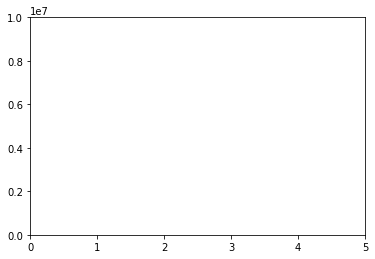

In [25]:
plt.plot(x, y)
plt.axis([0,5,0,10000000])
plt.show()